# **Data Modelling and Evaluation**

## Objectives
- Answer business requirement 2 : Whether a leave is powdery-mildew 

## Inputs
* inputs/cherry_dataset/cherry-leaves/test
- inputs/cherry_dataset/cherry-leaves/train
* inputs/cherry_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs 
- Images distribution plot in train, validation, and test set.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Machine learning model creation and training.
- Save the model.
- Learning curve plot for model performance.
- Model evaluation on pickle file.
- Prediction on the random image file.

# Import python packages

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Setting up directory to the parent directory

In [4]:
cwd = os.getcwd()
cwd

'/Users/rana/Documents/artificial_intelligence/PP5-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [5]:
os.chdir('/Users/rana/Documents/artificial_intelligence/PP5-mildew-detection-in-cherry-leaves')
print('Parent directory set')

Parent directory set


In [6]:
current_dir = os.getcwd()
current_dir

'/Users/rana/Documents/artificial_intelligence/PP5-mildew-detection-in-cherry-leaves'

## Setting input directory

In [7]:
data_dir = 'inputs/cherry_dataset/cherry-leaves'
train_path = data_dir + '/train'
val_path = data_dir + '/validation'
test_path = data_dir + '/test'

## Setting Ouput directory


In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Setting labels

In [9]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


## Import set image shape


In [10]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(50, 50, 3)

# Checking number of images in train, test, and validate datasets

/var/folders/8k/tq0zypfs0nj94md0lwzwjpg80000gn/T/ipykernel_19833/2827683086.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8k/tq0zypfs0nj94md0lwzwjpg80000gn/T/ipykernel_19833/2827683086.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8k/tq0zypfs0nj94md0lwzwjpg80000gn/T/ipykernel_19833/2827683086.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8k/tq0zypfs0nj94md0lwzwjpg80000gn/T/ipykernel_19833/2827683086.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8k/tq0zypfs0nj94md0lwzwjpg80000gn/T/ipykernel_19833/282

* test - powdery_mildew: 422 images
* test - healthy: 422 images
* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images




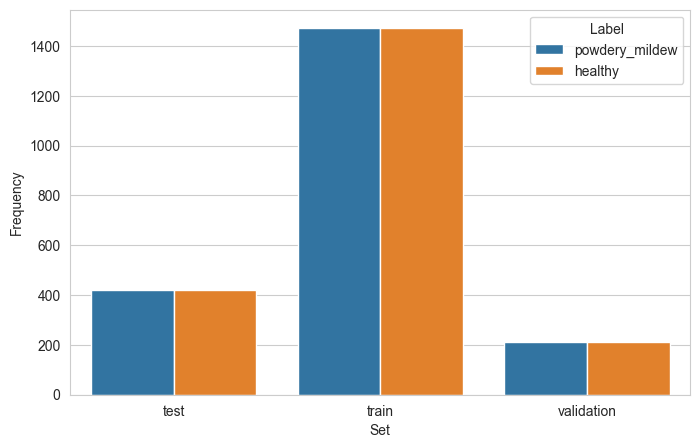

In [12]:
df = pd.DataFrame([])
for folder in ['test', 'train', 'validation']:
    for label in labels:
        df = df.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()